In [5]:
import numpy as np
import pandas as pd
import csv
with open(r"C:\Users\roman\Desktop\DMS_data\DMS_data\GFP_AEQVI_Sarkisyan_2016.csv") as dms_GFP_datei:
    dms_GFP_datei_object = csv.reader(dms_GFP_datei, delimiter=',')
    print(dms_GFP_datei_object)
    for row in dms_GFP_datei_object:
        print(row)
GFP_dataset = pd.read_csv(r"C:\Users\roman\Desktop\DMS_data\DMS_data\GFP_AEQVI_Sarkisyan_2016.csv")
print(GFP_dataset)
#Import the dataset

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



['F114I:I171T', 'MSKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKFICTTGKLPVPWPTLVTTLSYGVQCFSRYPDHMKQHDFFKSAMPEGYVQERTIFFKDDGNYKTRAEVKIEGDTLVNRIELKGIDFKEDGNILGHKLEYNYNSHNVYIMADKQKNGIKVNFKIRHNTEDGSVQLADHYQQNTPIGDGPVLLPDNHYLSTQSALSKDPNEKRDHMVLLEFVTAAGITHGMDELYK', '3.67937040905', '1']
['F114I:I161V', 'MSKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKFICTTGKLPVPWPTLVTTLSYGVQCFSRYPDHMKQHDFFKSAMPEGYVQERTIFFKDDGNYKTRAEVKIEGDTLVNRIELKGIDFKEDGNILGHKLEYNYNSHNVYIMADKQKNGVKVNFKIRHNIEDGSVQLADHYQQNTPIGDGPVLLPDNHYLSTQSALSKDPNEKRDHMVLLEFVTAAGITHGMDELYK', '3.84434879708', '1']
['F114I:I136F:N164D:K214E:A226G', 'MSKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKFICTTGKLPVPWPTLVTTLSYGVQCFSRYPDHMKQHDFFKSAMPEGYVQERTIFFKDDGNYKTRAEVKIEGDTLVNRIELKGIDFKEDGNFLGHKLEYNYNSHNVYIMADKQKNGIKVDFKIRHNIEDGSVQLADHYQQNTPIGDGPVLLPDNHYLSTQSALSKDPNEERDHMVLLEFVTGAGITHGMDELYK', '1.3010300125799998', '0']
['F114I:I128V:D133G', 'MSKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKFICTTGKLPVPWPTLVTTLSYGVQCFSRYPDHMKQHDFFKSAMPEGYVQERTIFFKDDGNYKTRAEVKI

      New_AS  Fitness_Score
4          R       3.738586
48         Q       3.750487
703        E       3.666278
924        M       3.698336
1160       T       3.629775
...      ...            ...
51709      N       3.809468
51710      C       3.760217
51711      D       3.754101
51712      F       3.673173
51713      H       3.735417

[1084 rows x 2 columns]


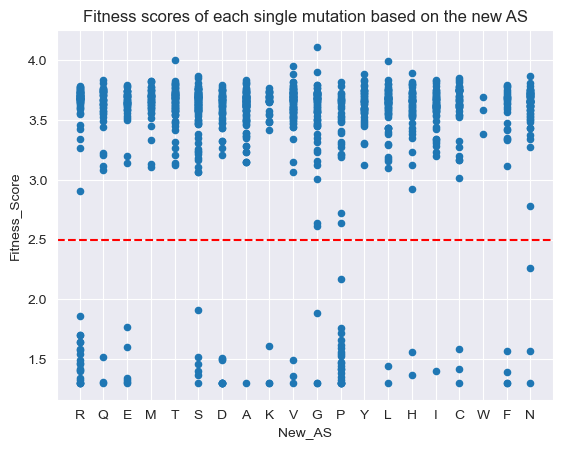

In [6]:
letzter_buchstabe = []
for index, row in GFP_dataset.iterrows():
    last_character = row["mutant"][-1]
    letzter_buchstabe.append(last_character)
letzter_buchstabe_df = pd.DataFrame(letzter_buchstabe, columns=["New_AS"])
#Letzter Buchstabe in jeder Zeile

number_mutations = GFP_dataset["mutant"].str.count(":") + 1
number_mutations_Single = number_mutations == 1
#True sind alle Zeilen, die nur eine Mutation tragen

single_mutants_df = letzter_buchstabe_df[number_mutations_Single]
#Filtert alle True Zeilen aus beiden Dataframes und erstellt ein neues Dataframe. Er übernimmt automatisch die Filterung nach "True"-Werten
dms_score_df = []
for index, row in GFP_dataset.iterrows():
    dms_score = row["DMS_score"]
    dms_score_df.append(dms_score)
dms_score_df_alle = pd.DataFrame(dms_score_df, columns=["Fitness_Score"])
#erstellt Dataframe mit allen DMS-scores und der jeweiligen Experimentnummer

dms_score_filtered = dms_score_df_alle[number_mutations_Single]
#Dataframe mit allen DMS-scores der Einzelmutanten

dms_score_filtered_newAS = single_mutants_df.join(dms_score_filtered)
print(dms_score_filtered_newAS)
#Kombiniert und erstellt ein neues Dataframe mit der neuen AS und dem jeweiligen DMS-score
import matplotlib.pyplot as plt
dms_score_filtered_newAS.plot(x="New_AS", y="Fitness_Score", kind="scatter")
plt.title("Fitness scores of each single mutation based on the new AS")
threshold = 2.5
plt.axhline(threshold, color='red', linestyle='--', label='Threshold')
plt.show()
#Plot shows all the single mutants (new AA) with the corresponding dms-score. There is a clear cut off at 2.5 visible. Everything underneath is completely unfunctional

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap

mutation_subsets = np.array_split(Roman_1['Position'].unique(), 4)  # Split into 4 subsets

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Create a custom colormap with the first and last colors from 'cividis'
cividis = plt.cm.get_cmap('cividis')
colors = [cividis(0), cividis(255)]
cmap = ListedColormap(colors)

# Create a shared colorbar with two ticks for the two possibilities
cbar_ticks = [0.25, 0.75]
cbar_ticklabels = ['Mutation does not exist', 'Mutation exists']

# Define a custom sorting function for the y-axis values
def position_sort(position):
    if position.isdigit():
        return int(position)
    else:
        return position

# Iterate over subsets and create heatmaps
for i, subset in enumerate(mutation_subsets):
    row = i // 2
    col = i % 2

    # Filter data based on subset
    subset_df = Roman_1[Roman_1['Position'].isin(subset)]

    # Sort the data by "Mutation Position" column in ascending order
    subset_df = subset_df.sort_values('Position')

    # Create cross-tabulation
    cross_tab = pd.crosstab(subset_df['Position'], subset_df['New_AS'])

    # Sort the columns alphabetically for better visualization
    cross_tab_sorted = cross_tab.reindex(sorted(cross_tab.columns), axis=1)

    # Sort the rows based on the custom y-axis sorting function
    cross_tab_sorted = cross_tab_sorted.iloc[sorted(range(len(cross_tab_sorted)), key=lambda x: position_sort(cross_tab_sorted.index[x]))]

    # Create heatmap in the corresponding subplot
    ax = sns.heatmap(cross_tab_sorted, cmap=cmap, annot=False, fmt='d', ax=axes[row, col],
                     cbar_kws={'ticks': cbar_ticks, 'drawedges': True})

    axes[row, col].set_xlabel('New Amino Acid')
    axes[row, col].set_ylabel('Mutation Position')
    axes[row, col].set_title(f'Subset {i+1}')

    # Set colorbar tick labels
    cbar = ax.collections[0].colorbar
    cbar.set_ticklabels(cbar_ticklabels)

# Adjust the layout and show the plot
plt.tight_layout()
plt.show()

#A heatmap to see which single mutations are available in the dataset and which are not.
#Only focuses on the new amino acid that occurs, not the old one before the mutation.

NameError: name 'Roman_1' is not defined

In [50]:
grouped_by_amino_acid = Roman_1.groupby('New_AS')
grouped_by_position = Roman_1.groupby("Position")
mean_dms_by_amino_acid = grouped_by_amino_acid["Fitness_Score"].mean()
median_dms_by_amino_acid = grouped_by_amino_acid["Fitness_Score"].median()
mean_dms_by_position = grouped_by_position["Fitness_Score"].mean()
median_dms_by_position = grouped_by_position["Fitness_Score"].median()
results_mean_median_AA_df = pd.DataFrame({
    "Mean DMS by Amino Acid": mean_dms_by_amino_acid,
    "Median DMS by Amino Acid": median_dms_by_amino_acid})
results_mean_median_pos_df = pd.DataFrame({
    "Mean DMS by Position": mean_dms_by_position,
    "Median DMS by Position": median_dms_by_position})
# Sort the DataFrame ascending position wise
results_mean_median_pos_df.sort_values("Position", inplace=True)

# Reset the index
results_mean_median_pos_df.reset_index(drop=True, inplace=True)
results_mean_median_pos_df["Position"] = results_mean_median_pos_df.index + 1

print(results_mean_median_pos_df)
print(results_mean_median_AA_df)
#General analysis of the mean and median of the dms-score of both factors: new amino acid and position of the mutation.

     Mean DMS by Position  Median DMS by Position  Position
0                3.537131                3.544708         1
1                3.086886                3.323669         2
2                3.684315                3.683229         3
3                3.546847                3.609839         4
4                3.554441                3.570019         5
..                    ...                     ...       ...
228              3.625334                3.640983       229
229              1.414276                1.361264       230
230              3.703226                3.695191       231
231              3.020505                3.486613       232
232              3.715067                3.732758       233

[233 rows x 3 columns]
        Mean DMS by Amino Acid  Median DMS by Amino Acid
New_AS                                                  
A                     3.568873                  3.635771
C                     3.484644                  3.659148
D                     3.2437

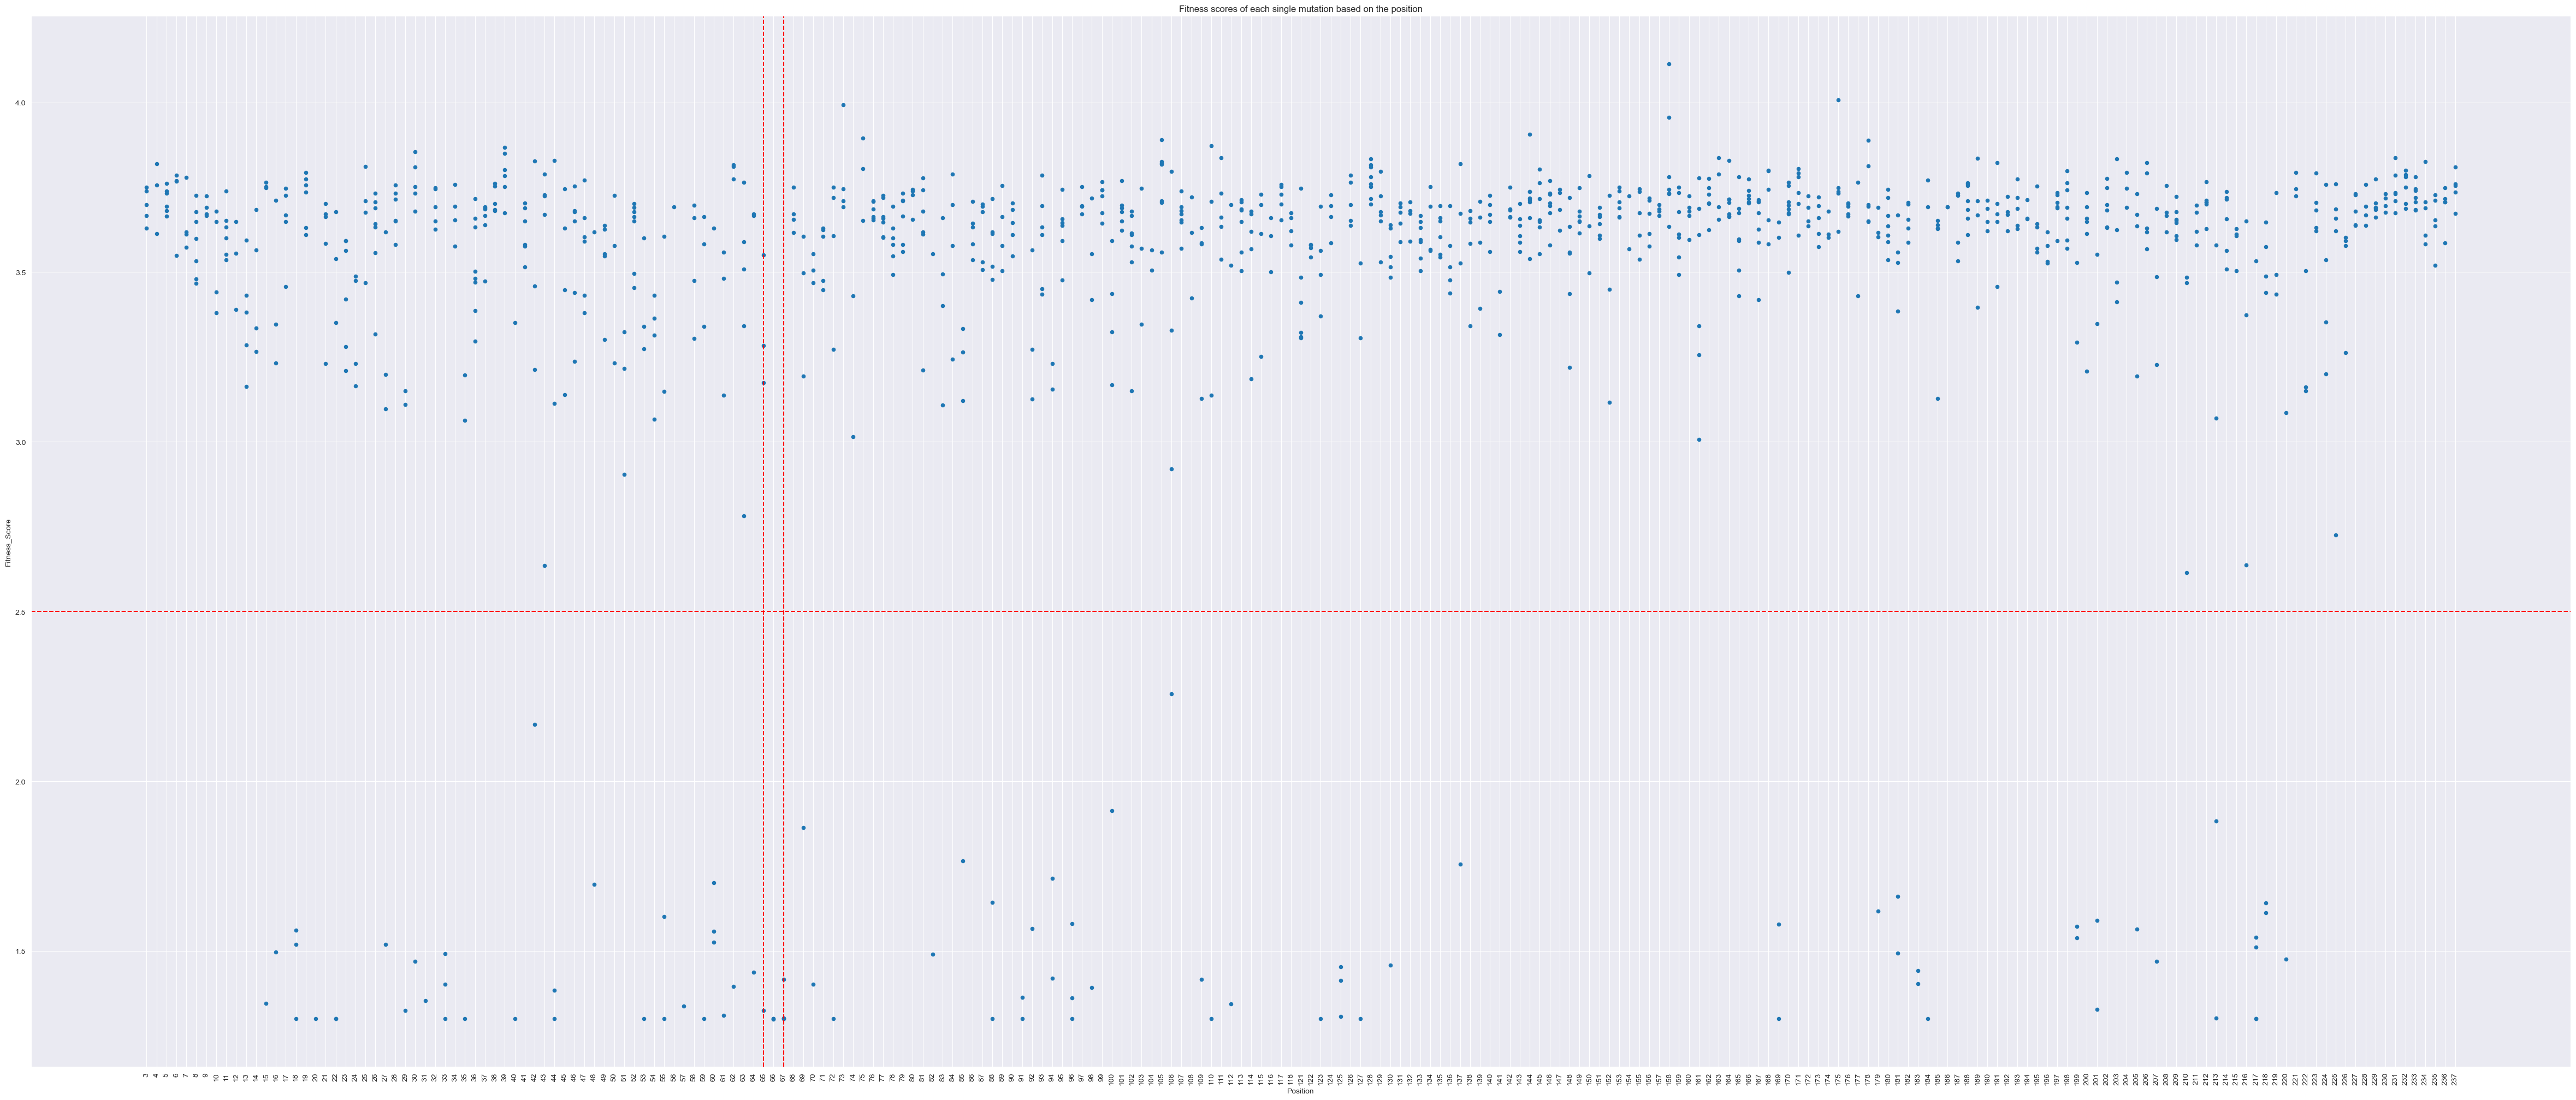

In [10]:
mutations_pos = []
for index, row in GFP_dataset.iterrows():
    mutations_pos_nummer = row["mutant"][1:-1]
    mutations_pos.append(mutations_pos_nummer)
mutations_pos_df = pd.DataFrame(mutations_pos, columns=["Position"])
#Entfernt erstmal nur das erste und letzte Zeichen
number_mutations = GFP_dataset["mutant"].str.count(":") + 1
number_mutations_Single = number_mutations == 1
#True sind alle Zeilen, die nur eine Mutation tragen

single_mutants_df_pos = mutations_pos_df[number_mutations_Single]
#Erstellt ein Dataframe, dass die Positionen innerhalb des Proteins aller Einzelmutanten zeigt

mutations_pos_df_mit_scores = single_mutants_df_pos.join(dms_score_filtered)
#Kombiniert und erstellt Dataframe mit der Position der Mutation und dem jeweiligen DMS-score (zeigt NICHT die neuen AS)
new_column = mutations_pos_df_mit_scores["Position"]
Roman_1 = dms_score_filtered_newAS.join(new_column)
Roman_1 = Roman_1[["Position", "New_AS", "Fitness_Score"]]
#Erstellt neues Dataframe mit Position, neuer AS und DMS-score
import matplotlib.pyplot as plt
mutations_pos_df_mit_scores.plot(x="Position", y="Fitness_Score", kind="scatter")
plt.title("Fitness scores of each single mutation based on the position")
#plt.figure(figsize=(100, 6))
#Macht das Diagramm auf Größe "Breite, Höhe" größer

#plt.xticks(rotation=45)  #
##Rotate the x-axis labels by 45 degrees

plt.xticks(rotation='vertical')
# Rotate the x-axis labels vertically
plt.gcf().set_size_inches(60, 25)
#Increase the width to 10 inches and height to 6 inches

a_threshold = 2.5
plt.axhline(threshold, color='red', linestyle='--', label='Threshold')
a_threshold_65 = 62
plt.axvline(a_threshold_65, color='red', linestyle='--', label='Threshold_65')
a_threshold_67 = 64
plt.axvline(a_threshold_67, color='red', linestyle='--', label='Threshold_67')
#Positionen 65-67 gehören zum Chromophor
#Interessant ist hier, dass es Mutationen gibt, die trotz Mutation im Chromophor an Position 65 einen guten score haben. Position 66 und 67 jedoch nicht
plt.show()

#Plot mit single Mutanten basierend auf Position der Mutation.!!!!!!!!!!!!!!!!!!
#Plot shows all the single mutations that occured at a specific position (x-axis) against the dms-score (y-axis)

In [11]:
gesuchte_AS = "R"
#Spezifische AS nach der ich suche
maske_gesuchte_AS = Roman_1["New_AS"] == gesuchte_AS
#Macht eine boolean-Maske
gesuchte_AS_df = Roman_1[maske_gesuchte_AS]
#Alle Zeilen die meine BEdingung erfüllen werden geindext

print(gesuchte_AS_df)
#Searches for all of a specific AA using a boolean mask and displays them

      Position New_AS  Fitness_Score
4            3      R       3.738586
1755         5      R       3.761089
2782         6      R       3.785387
3621         7      R       3.779372
6379        10      R       3.678994
...        ...    ...            ...
51623      228      R       3.758577
51666      231      R       3.709842
51676      232      R       3.688017
51684      233      R       3.781390
51706      236      R       3.706509

[78 rows x 3 columns]


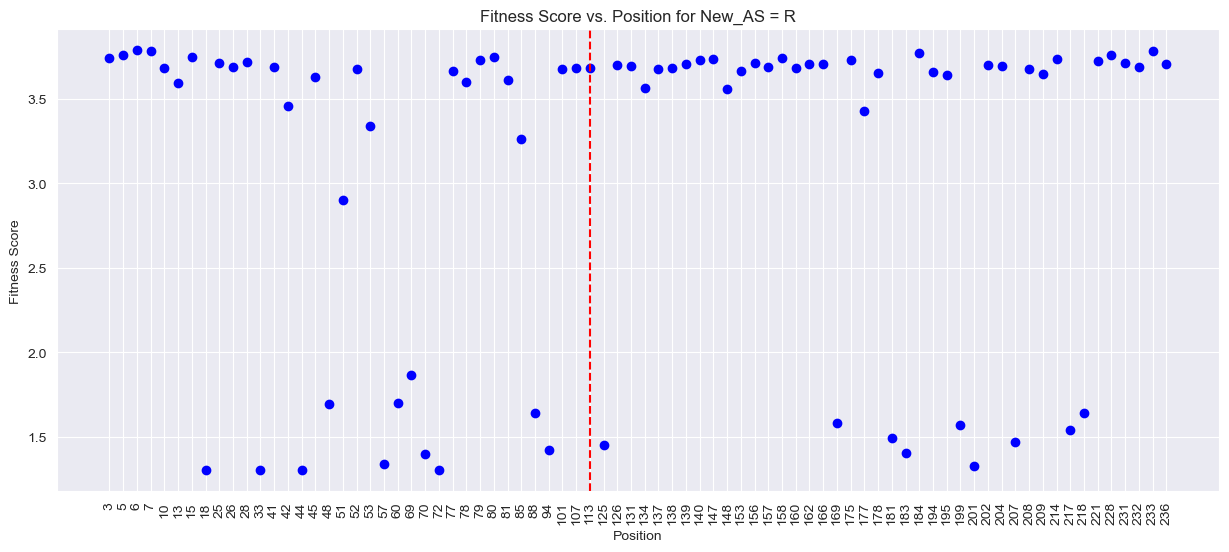

In [12]:
import matplotlib.pyplot as plt

gesuchte_AS = "R"
maske_gesuchte_AS = Roman_1["New_AS"] == gesuchte_AS
gesuchte_AS_df = Roman_1[maske_gesuchte_AS]

plt.scatter(gesuchte_AS_df["Position"], gesuchte_AS_df["Fitness_Score"], color='b')
plt.xlabel("Position")
plt.ylabel("Fitness Score")
plt.title(f"Fitness Score vs. Position for New_AS = {gesuchte_AS}")
plt.xticks(rotation='vertical')
# Rotate the x-axis labels vertically
plt.gcf().set_size_inches(15, 6)
c_threshold_65 = 35
plt.axvline(c_threshold_65, color='red', linestyle='--', label='Threshold_65')
plt.show()
#Plots all the found positions of the previous AA-search with their corresponding dms-scores.

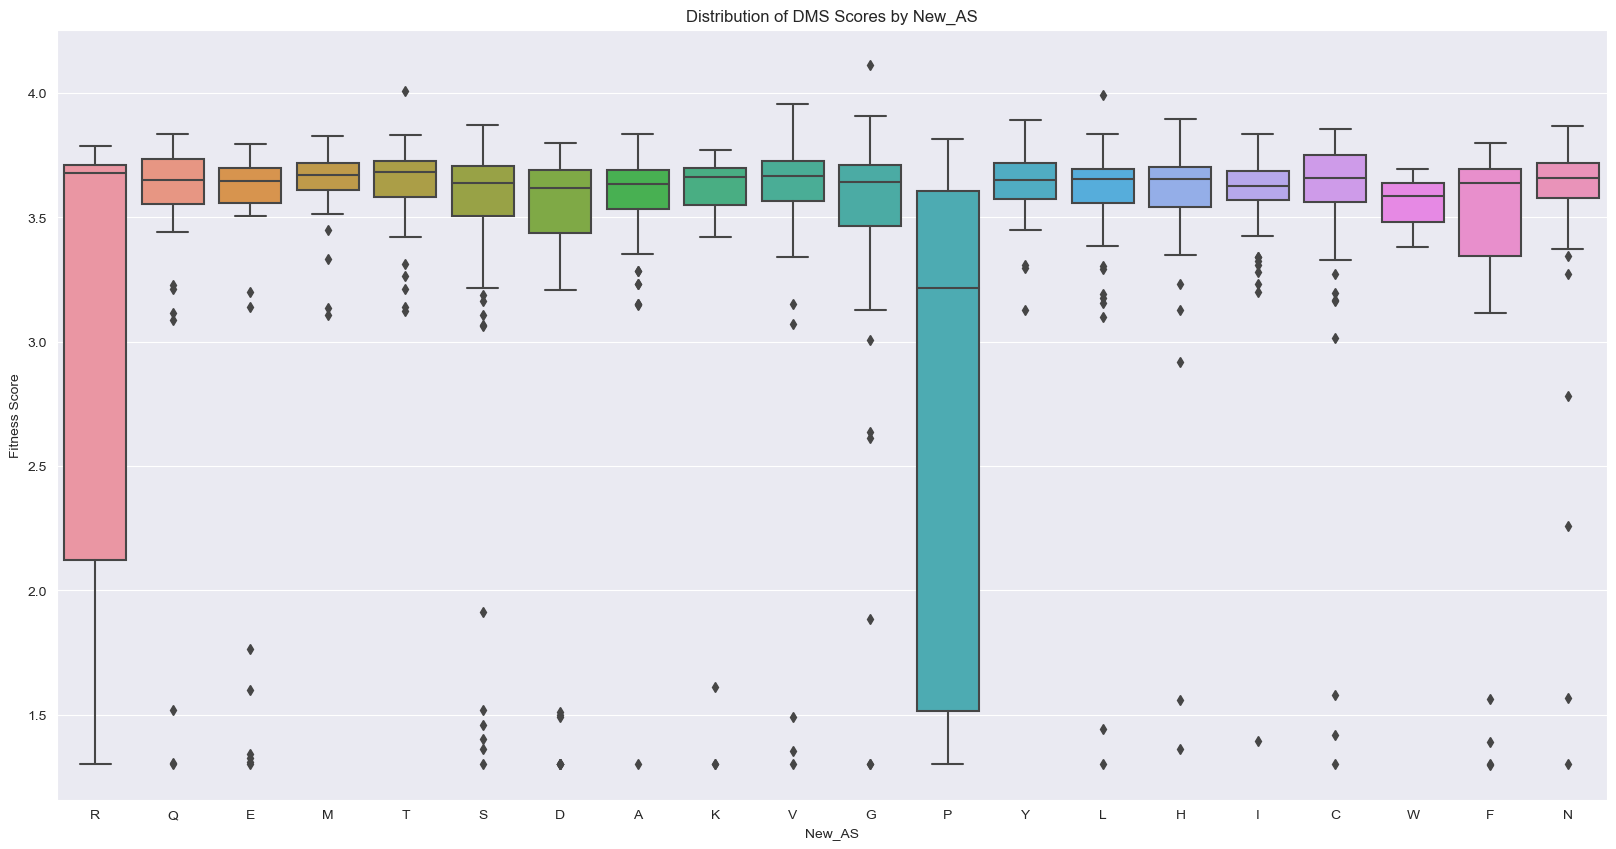

In [13]:
import seaborn as sns

# Assuming you have already grouped the data by mutation position
grouped_by_amino_acid = Roman_1.groupby('New_AS')

# Create an empty list to store the DMS scores for each group
dms_scores_per_group_new_AS = []

# Iterate over each group and extract the DMS scores
for position, group in grouped_by_amino_acid:
    dms_scores_per_group_new_AS.append(group['Fitness_Score'])

# Create a box plot
sns.boxplot(x='New_AS', y='Fitness_Score', data=Roman_1)
plt.xlabel('New_AS')
plt.ylabel('Fitness Score')
plt.title('Distribution of DMS Scores by New_AS')
#plt.xticks(range(0, len(grouped_by_amino_acid), 10))
plt.gcf().set_size_inches(20, 10)
plt.show()

#Box has 50% of all values, from the first quantile to the 3rd (25% to 75%)
#The whiskers reach from 0%-25% and 75%-100%. There are outliers visible.
#Arginine (R) and Proline (P) display big boxes, which means they have a high variance within their group. Therefore, mutations involving a Proline or Arginine have a broad range of dms-scores --> Interesting to analyse.
#It seems, that this effect of dms-score distribution is dependent of the position where the mutation occurs.
#This does not show, how many values each box contains, so if an amino acid only has few values, the boxplot does not convey reliable information.

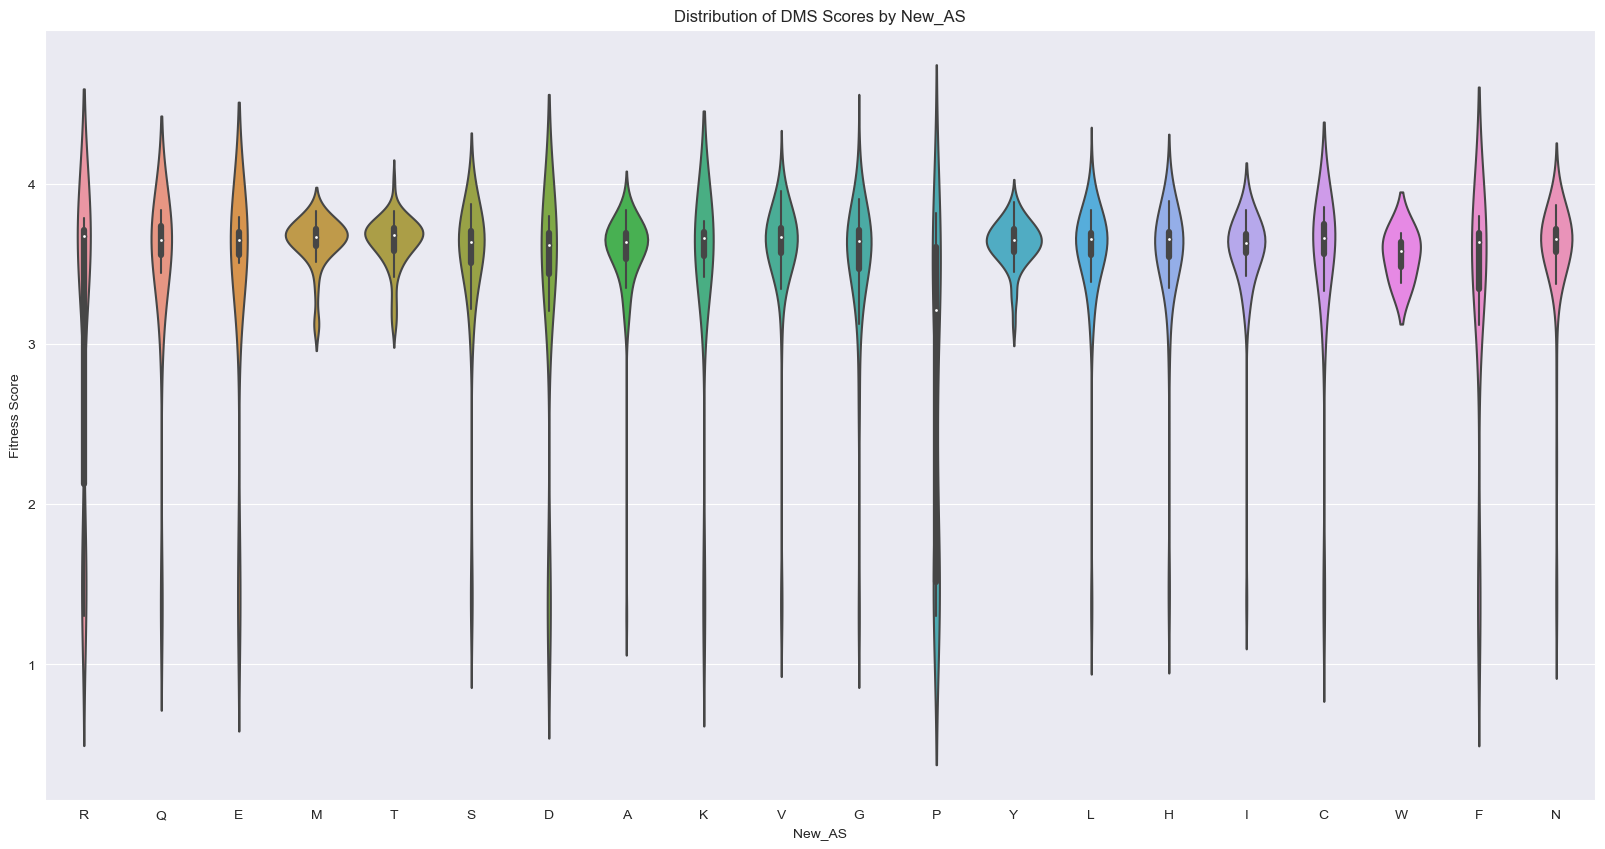

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have already grouped the data by mutation position
grouped_by_amino_acid = Roman_1.groupby('New_AS')

# Create an empty list to store the DMS scores for each group
dms_scores_per_group_new_AS = []

# Iterate over each group and extract the DMS scores
for position, group in grouped_by_amino_acid:
    dms_scores_per_group_new_AS.append(group['Fitness_Score'])

# Create a violin plot
sns.violinplot(x='New_AS', y='Fitness_Score', data=Roman_1)
plt.xlabel('New_AS')
plt.ylabel('Fitness Score')
plt.title('Distribution of DMS Scores by New_AS')
#plt.xticks(range(0, len(grouped_by_amino_acid), 10))
plt.gcf().set_size_inches(20, 10)
plt.show()
#A violin plot displays the entire distribution of the data, including information about the kernel density estimation. The width of the violin at a particular point represents the density or probability of observing data points at that value. The plot may also include lines or markers to indicate summary statistics such as the median or quartiles.
#Black dot = median
#P and R show a large interquantile range, which means the data is broadly distributed, hence the narrow and elongated shape of the plot. The other amino acids show clear boxplots inside the violin plot and also have more compact distributions.
#This overlaps with the boxplots up above

In [15]:
#Examining the Chromophore

gesuchte_pos_65 = "65"
#Spezifische Position nach der ich suche
maske_gesuchte_pos_65 = Roman_1["Position"] == gesuchte_pos_65
#Macht eine boolean-Maske
gesuchte_pos_65_df = Roman_1[maske_gesuchte_pos_65]
#Alle Zeilen die meine Bedingung erfüllen werden geindext
print(gesuchte_pos_65_df)
#--------------------------------------------------------------------------------------------------------------------------
gesuchte_pos_66 = "66"
#Spezifische Position nach der ich suche
maske_gesuchte_pos_66 = Roman_1["Position"] == gesuchte_pos_66
#Macht eine boolean-Maske
gesuchte_pos_66_df = Roman_1[maske_gesuchte_pos_66]
#Alle Zeilen die meine Bedingung erfüllen werden geindext
print(gesuchte_pos_66_df)
#----------------------------------------------------------------------------------------------------------------------------
gesuchte_pos_67 = "67"
#Spezifische Position nach der ich suche
maske_gesuchte_pos_67 = Roman_1["Position"] == gesuchte_pos_67
#Macht eine boolean-Maske
gesuchte_pos_67_df = Roman_1[maske_gesuchte_pos_67]
#Alle Zeilen die meine Bedingung erfüllen werden geindext
print(gesuchte_pos_67_df)
#Out of the mutations we have available in our dataset, position 66 and 67 are completely deleterious. Position 65 experiences loss of function when mutated to proline, but maintains some activity when mutated to Leucine or Alanine, whilst a mutation to Threonine has the highest remaining activity. This is due to the necessary folding of the chromophore to achieve fluorescence.

      Position New_AS  Fitness_Score
30590       65      T       3.550427
30708       65      P       1.324287
30737       65      L       3.174363
30756       65      A       3.284241
      Position New_AS  Fitness_Score
30871       66      C       1.301031
30903       66      N       1.301031
30988       66      F       1.298941
      Position New_AS  Fitness_Score
31047       67      V       1.301547
31063       67      D       1.300841
31070       67      C       1.416921
31099       67      S       1.301030


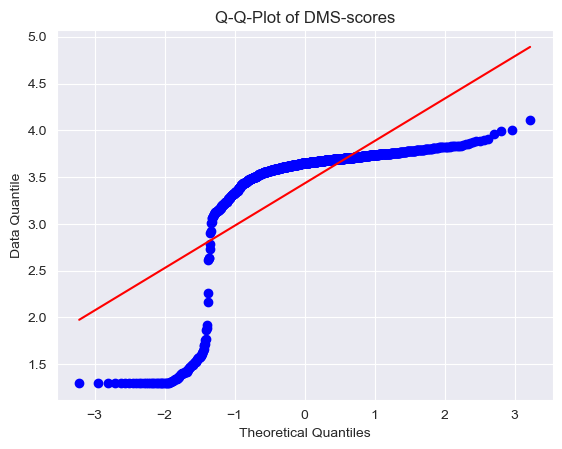

In [16]:
#Statistical tests, such as ANOVA (with and without bonferroni correction) and eta-squared were performed. However, the results from these tests cannot be reliably interpreted, since the requirement of the data being normally distributed does not apply, as the following Q-Q-plot depicts:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import probplot

# Extrahiert die Spalte mit den Fitness-Scores
fitness_scores = Roman_1['Fitness_Score'].values

# Q-Q-Plot erstellen
probplot(fitness_scores, dist="norm", plot=plt)
#The red line marks an ideal normal distribution.

# Beschriftungen hinzufügen
plt.title("Q-Q-Plot of DMS-scores")
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Data Quantile")

# Plot anzeigen
plt.show()
#As we can see, our data from the single mutants is, as expected, not normally distributed.

In [19]:
#Next, a Mann-Whitney-U test was performed, to try to compare the significance of the effect of either parameter (mutated position or new amino acid).
import pandas as pd
import scipy.stats as stats
#Ich will meine Werte sortieren
def position_sort(position):
    if position.isdigit():
        return int(position)
    else:
        return position
#Leere Liste
results = []
#Gruppierung basierend auf Position und Aminosäure
grouped_position = Roman_1.groupby('Position')
grouped_AS = Roman_1.groupby("New_AS")

# Konvertiert die Positionsspalte in numerische Werte
Roman_1['Position'] = pd.to_numeric(Roman_1['Position'])

#Whitney-Test für alle Kombinationen von Position und AS durchgeführt --> Signifikanter Unterschied in den Fitness-Scores zwischen verschiedenen Positionen und AS?
for position, group_position in grouped_position:
    for AS, group_AS in grouped_AS:
        fitness_scores_position = group_position['Fitness_Score'].values
        fitness_scores_AS = group_AS['Fitness_Score'].values

        statistic, p_value = stats.mannwhitneyu(fitness_scores_position, fitness_scores_AS, alternative='two-sided')
#Alpha-Wert selbst gesetzt
        alpha = 0.05

        result = {'Position': position,'Aminosäure': AS,'Teststatistik': statistic,'P-Wert': p_value,'Signifikanz': "Ja" if p_value < alpha else "Nein"}

        results.append(result)
#Ergebnisse ausspucken lassen
summary_df = pd.DataFrame(results)
#Sortieren nach aufsteigender Positionsnummer
summary_df = summary_df.sort_values('Position', ascending=True)
print(summary_df)

#Wenn p-Wert <0,05 (alpha), dann signifikant --> Fitness-Score zwischen den Gruppen nicht gleich

##Wenn der p-Wert klein ist (typischerweise kleiner als 0,05), deutet dies darauf hin, dass es einen statistisch signifikanten Unterschied in den Fitness-Scores zwischen den Positionen und Aminosäuren gibt.

##Wenn der p-Wert größer als 0,05 ist, wird die Nullhypothese beibehalten, was bedeutet, dass kein statistisch signifikanter Unterschied in den Fitness-Scores zwischen den Positionen und Aminosäuren vorliegt.

#Verwendet für große Stichproben und nicht normalverteilt

#Der Mann-Whitney-U-Test wird verwendet, um zu prüfen, ob es statistisch signifikante Unterschiede in den Verteilungen der Fitness-Scores zwischen den Positionen und Aminosäuren gibt.

#Nullhypothese: Es gibt keinen signifikanten Unterschied in den Fitness-Scores zwischen den verschiedenen Positionen und Aminosäuren.

# Überprüft, ob Position und Aminosäure in Roman_1 vorhanden sind
mask = summary_df.apply(lambda row: (row['Position'], row['Aminosäure']) in zip(Roman_1['Position'], Roman_1['New_AS']), axis=1)

# Filtert das summary_df entsprechend der Maske
summary_df_filtered = summary_df[mask]

print(summary_df_filtered)

      Position Aminosäure  Teststatistik    P-Wert Signifikanz
0            3          A          309.0  0.079040        Nein
19           3          Y          144.0  0.232238        Nein
18           3          W           13.0  0.142857        Nein
17           3          V          255.0  0.318906        Nein
16           3          T          193.5  0.404197        Nein
...        ...        ...            ...       ...         ...
4641       237          C          175.5  0.074290        Nein
4640       237          A          368.0  0.002568          Ja
4658       237          W           14.0  0.071429        Nein
4648       237          K          137.0  0.004080          Ja
4659       237          Y          177.0  0.016339          Ja

[4660 rows x 5 columns]
      Position Aminosäure  Teststatistik    P-Wert Signifikanz
16           3          T          193.5  0.404197        Nein
13           3          Q          129.5  0.349664        Nein
10           3          M     

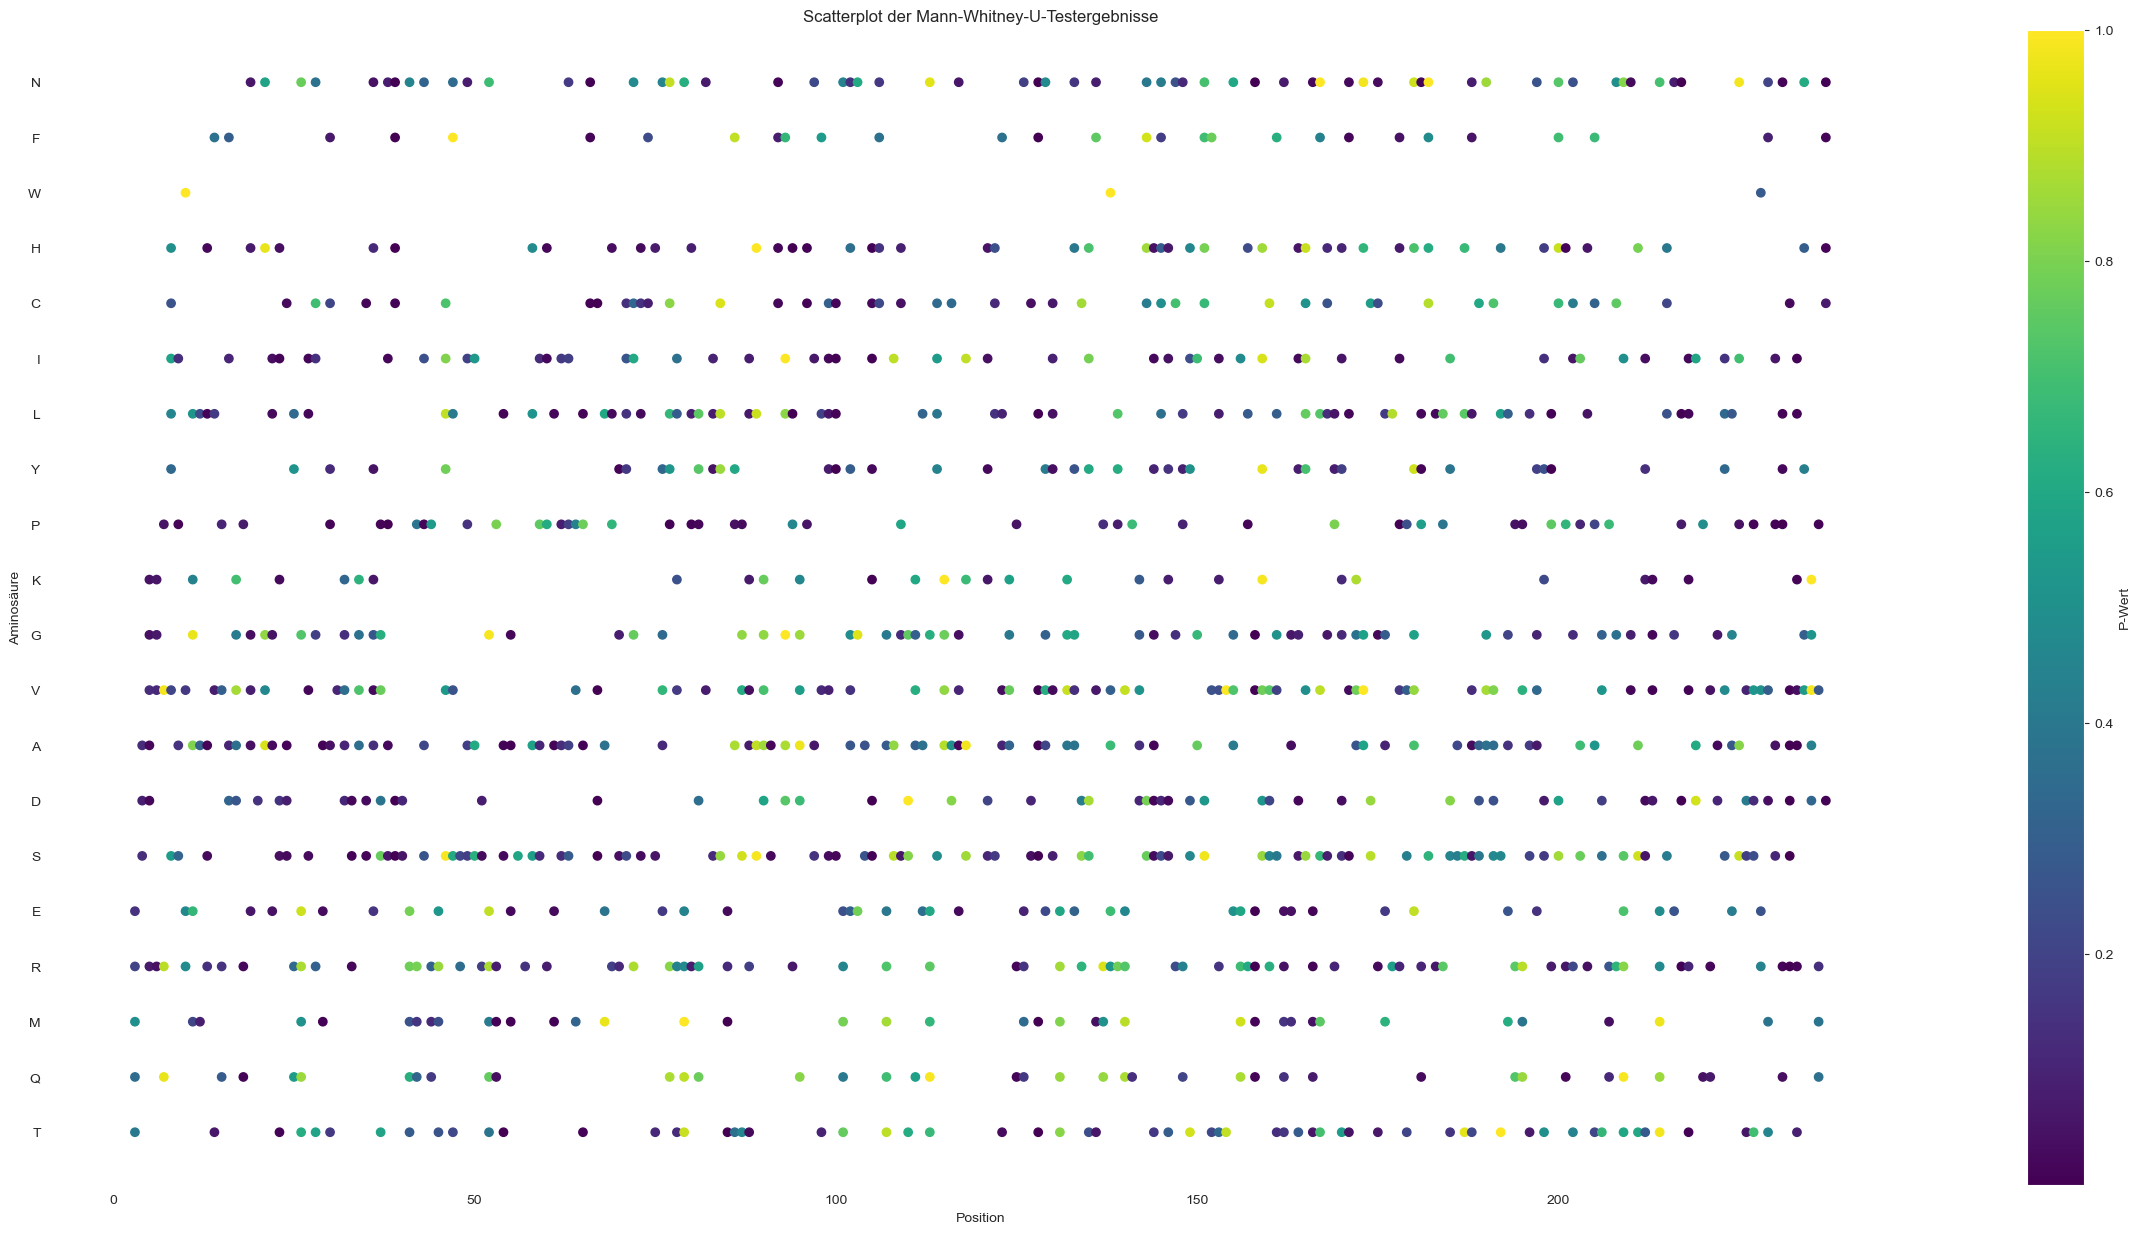

In [23]:
import matplotlib.pyplot as plt
import pandas as pd

# Scatterplot erstellen
plt.figure(figsize=(30, 15))  # Größe des Plots anpassen

# Position und Aminosäure auf den Achsen darstellen
plt.scatter(summary_df_filtered['Position'], summary_df_filtered['Aminosäure'], c=summary_df_filtered['P-Wert'], cmap='viridis')

# Achsentitel und Titel des Plots festlegen
plt.xlabel('Position')
plt.ylabel('Aminosäure')
plt.title('Scatterplot der Mann-Whitney-U-Testergebnisse')

# Farbskala hinzufügen
cbar = plt.colorbar()
cbar.set_label('P-Wert')
# Hintergrundfarbe des Plots auf weiß setzen
plt.gca().set_facecolor('white')
# Plot anzeigen
plt.show()

In [66]:
#Der Kruskal-Wallis-Test ist eine nichtparametrische Methode, die auf Ränge basiert und daher keine Annahmen über die Verteilung der Daten macht. Er ermöglicht den Vergleich der Verteilungen zwischen mehreren Gruppen, unabhängig von ihrer Normalverteilung oder Varianzhomogenität.
import pandas as pd
import scipy.stats as stats

# Gruppen basierend auf Position erstellen
grouped_position_2 = Roman_1.groupby('Position')

# Liste zum Speichern der Fitness-Scores für jede Position
position_scores = []

# Schleife über die Positionen
for position, group_data in grouped_position_2:
    # Fitness-Scores für die aktuelle Position
    fitness_scores = group_data['Fitness_Score'].values
    position_scores.append(fitness_scores)

# Kruskal-Wallis-Test
statistic, p_value = stats.kruskal(*position_scores)

alpha = 0.05

print("Kruskal-Wallis-Test")
print(f"Teststatistik: {statistic}")
print(f"P-Wert: {p_value}")

if p_value < alpha:
    print("Es gibt einen signifikanten Unterschied zwischen den Positionen.")
else:
    print("Es gibt keinen signifikanten Unterschied zwischen den Positionen.")


Kruskal-Wallis-Test
Teststatistik: 577.8469817125756
P-Wert: 1.8399990857612868e-31
Es gibt einen signifikanten Unterschied zwischen den Positionen.


In [26]:
import pandas as pd
import scipy.stats as stats

# Gruppen basierend auf Position und Aminosäure erstellen
grouped_position_as_2 = Roman_1.groupby(['Position', 'New_AS'])

# Liste zum Speichern der Fitness-Scores für jede Position und Aminosäure
position_as_scores = []

# Schleife über die Positionen und Aminosäuren
for (position, amino_acid), group_data in grouped_position_as_2:
    # Fitness-Scores für die aktuelle Position und Aminosäure
    fitness_scores = group_data['Fitness_Score'].values
    position_as_scores.append(fitness_scores)
#Die Fitness-Scores für jede Position und Aminosäure werden in einer Liste gespeichert und als Argumente für den Kruskal-Wallis-Test verwendet
# Kruskal-Wallis-Test
statistic, p_value = stats.kruskal(*position_as_scores)

alpha = 0.05

print("Kruskal-Wallis-Test")
print(f"Teststatistik: {statistic}")
print(f"P-Wert: {p_value}")

if p_value < alpha:
    print("Es gibt einen signifikanten Unterschied zwischen den Positionen und Aminosäuren.")
else:
    print("Es gibt keinen signifikanten Unterschied zwischen den Positionen und Aminosäuren.")
#In diesem Code werden die Fitness-Scores, Positionen und Aminosäuren separat in Listen gespeichert. Anschließend werden diese Listen als Daten für den Kruskal-Wallis-Test verwendet, um den Zusammenhang zwischen Positionen, Aminosäuren und Fitness-Scores zu überprüfen.

Kruskal-Wallis-Test
Teststatistik: 1083.0
P-Wert: 0.49428529234990104
Es gibt keinen signifikanten Unterschied zwischen den Positionen und Aminosäuren.


In [27]:
import pandas as pd
import scipy.stats as stats

# Gruppen basierend auf Position und Aminosäure erstellen
grouped_position_as_4 = Roman_1.groupby(['Position', 'New_AS'])

# Liste zum Speichern der Fitness-Scores pro Gruppe
fitness_scores_groups = []

# Schleife über die Positionen und Aminosäuren
for (position, amino_acid), group_data in grouped_position_as_4:
    # Fitness-Scores für die aktuelle Position und Aminosäure
    scores = group_data['Fitness_Score'].values

    # Fitness-Scores zur Liste hinzufügen
    fitness_scores_groups.append(scores)

# Friedman-Test
statistic, p_value = stats.friedmanchisquare(*fitness_scores_groups)

alpha = 0.05

print("Friedman-Test")
print(f"Teststatistik: {statistic}")
print(f"P-Wert: {p_value}")

if p_value < alpha:
    print("Es gibt einen signifikanten Unterschied zwischen den Positionen und Aminosäuren.")
else:
    print("Es gibt keinen signifikanten Unterschied zwischen den Positionen und Aminosäuren.")
#Der Friedman-Test wird verwendet, wenn du dieselben Proben in den verschiedenen Gruppen hast und die Daten abhängig sind (z.B. wiederholte Messungen an denselben Proben). Der Kruskal-Wallis-Test hingegen wird verwendet, wenn du unabhängige Stichproben hast.

#Da du denselben Datensatz verwendest, scheinen die Fitness-Scores abhängig zu sein, und daher ist es nicht überraschend, dass sowohl der Friedman-Test als auch der Kruskal-Wallis-Test zu ähnlichen Ergebnissen führen.

Friedman-Test
Teststatistik: 1083.0
P-Wert: 0.49428529234990104
Es gibt keinen signifikanten Unterschied zwischen den Positionen und Aminosäuren.


In [36]:
# Datensatz einlesen
import numpy as np
import pandas as pd
import csv
ASE_datei = pd.read_csv(r"C:\Users\roman\Desktop\AS Eigenschaften\aminoacids.csv")
print(ASE_datei)
#Name: name of the amino acid.
#Abbr: abbreviation of the amino acid.
#Letter: letter of the amino acid.
# Molecular Weight: molecular weight.
# Molecular Formula: molecular formula.
# Residue Formula: residue formula.
# Residue Weight: residue weight (-H20)
# pKa1: the negative of the logarithm of the dissociation constant for the -COOH group.
# pKb2: the negative of the logarithm of the dissociation constant for the -NH3 group.
# pKx3: the negative of the logarithm of the dissociation constant for any other group in the molecule.
# pl4: the pH at the isoelectric point.
# H: hydrophobicity.
# VSC: volumes of side chains amino acids.
# P1: polarity.
# P2: polarizability.
# SASA: solvent accesible surface area.
# NCISC: net charge of side chains.

              Name Abbr Letter  Molecular Weight Molecular Formula  \
0          Alanine  Ala      A             89.10           C3H7NO2   
1         Cysteine  Cys      C            121.16          C3H7NO2S   
2    Aspartic acid  Asp      D            133.11           C4H7NO4   
3    Glutamic acid  Glu      E            147.13           C5H9NO4   
4    Phenylalanine  Phe      F            165.19          C9H11NO2   
5          Glycine  Gly      G             75.07           C2H5NO2   
6        Histidine  His      H            155.16          C6H9N3O2   
7       Isoleucine  Ile      I            131.18          C6H13NO2   
8           Lysine  Lys      K            146.19         C6H14N2O2   
9          Leucine  Leu      L            131.18          C6H13NO2   
10      Methionine  Met      M            149.21         C5H11NO2S   
11      Asparagine  Asn      N            132.12          C4H8N2O3   
12  Hydroxyproline  Hyp      O            131.13           C5H9NO3   
13         Proline  

In [38]:
columns_to_delete = ['Name', 'Abbr', 'Molecular Formula', 'Residue Formula', "carbon", "hydrogen", "nitrogen", "oxygen", "sulfur"]
ASE_datei_2 = ASE_datei.drop(columns=columns_to_delete)
row_index_to_delete = 12
ASE_clear = ASE_datei.drop(row_index_to_delete)
print(ASE_clear)

              Name Abbr Letter  Molecular Weight Molecular Formula  \
0          Alanine  Ala      A             89.10           C3H7NO2   
1         Cysteine  Cys      C            121.16          C3H7NO2S   
2    Aspartic acid  Asp      D            133.11           C4H7NO4   
3    Glutamic acid  Glu      E            147.13           C5H9NO4   
4    Phenylalanine  Phe      F            165.19          C9H11NO2   
5          Glycine  Gly      G             75.07           C2H5NO2   
6        Histidine  His      H            155.16          C6H9N3O2   
7       Isoleucine  Ile      I            131.18          C6H13NO2   
8           Lysine  Lys      K            146.19         C6H14N2O2   
9          Leucine  Leu      L            131.18          C6H13NO2   
10      Methionine  Met      M            149.21         C5H11NO2S   
11      Asparagine  Asn      N            132.12          C4H8N2O3   
13         Proline  Pro      P            115.13           C5H9NO2   
14       Glutamine  

In [50]:
import pandas as pd
#Original sequence from the paper without mutations.
unmutated_sequence = "MSKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKFICTTGKLPVPWPTLVTTLSYGVQCFSRYPDHMKQHDFFKSAMPEGYVQERTIFFKDDGNYKTRAEVKFEGDTLVNRIELKGIDFKEDGNILGHKLEYNYNSHNVYIMADKQKNGIKVNFKIRHNIEDGSVQLADHYQQNTPIGDGPVLLPDNHYLSTQSALSKDPNEKRDHMVLLEFVTAAGITHGMDELYK"

# Erstellt ein dictionary, wo ich jeder Aminosäure Ihren Eigenschaftswert "Hydrophobizität" zuordne und abspeichere. Alle nan werden entfernt
property_map = dict(zip(ASE_clear["Letter"].dropna(), ASE_clear["H"].dropna()))

# Multiplizieren
result = 0
for AA in property_map.keys():
    quantity = sequence.count(AA)
    result += property_map[AA] * quantity

# Print the sum of the products
print(result)
#So hydrophob ist das ganze Protein

-9.68


In [40]:
# Erstellt ein dictionary, wo ich jeder Aminosäure Ihren Eigenschaftswert "Hydrophobizität" zuordne und abspeichere. Alle nan werden entfernt
property_map_mweight = dict(zip(ASE_clear["Letter"].dropna(), ASE_clear["Molecular Weight"].dropna()))

# Multiplizieren
result_mweight = 0
for AA in property_map.keys():
    quantity_mweight = sequence.count(AA)
    result_mweight += property_map_mweight[AA] * quantity_mweight

# Print the sum of the products
print(result_mweight)
#So schwer ist das ganze Protein
#GFP undergoes a maturation process where the protein undergoes cyclization and oxidation of specific residues, resulting in the formation of the chromophore responsible for fluorescence. This maturation process is usually catalyzed by endogenous cellular enzymes, and it occurs after protein synthesis. Therefore, if your in-silico calculation is based on the primary sequence before maturation, it may not accurately reflect the molecular weight of the mature form.

29129.250000000004


In [41]:
# Erstellt ein dictionary, wo ich jeder Aminosäure Ihren Eigenschaftswert "Hydrophobizität" zuordne und abspeichere. Alle nan werden entfernt
property_map_polar = dict(zip(ASE_clear["Letter"].dropna(), ASE_clear["P1"].dropna()))

# Multiplizieren
result_polar = 0
for AA in property_map.keys():
    quantity_polar = sequence.count(AA)
    result_polar += property_map_polar[AA] * quantity_polar

# Print the sum of the products
print(result_polar)
#So polar ist das ganze Protein

1997.6000000000001


In [59]:
# Assuming "Letter" column contains the amino acid letters and "H" column contains the property values
property_map = dict(zip(ASE_clear["Letter"].dropna(), ASE_clear["H"].dropna()))

# Create a list to store the results
results = []

# Calculate the neighbourhood score for every 7-amino-acid window
for i in range(len(sequence) - 6):
    neighbourhood = sequence[i:i+7]  # Get the 7-amino-acid neighbourhood sequence
    score = sum(property_map.get(AA, 0) for AA in neighbourhood)  # Calculate the sum of property values in the neighbourhood
    #sorgt dafür, dass er erstmal schaut, ob es für jede AS spezifisch einen Wert in der Spalte gibt
    results.append((neighbourhood, score))  # Store the neighbourhood sequence and its corresponding score

# Create a dataframe from the results
df = pd.DataFrame(results, columns=["Neighbourhood", "H-Neighbour"])

# Print the dataframe
print(df)
#Macht ein Dataframe mit allen Nachbarschaften und den jeweiligen Ergebnissen
##Nachbarschaften von Hydrophobicität

    Neighbourhood  H-Neighbour
0         MSKGEEL        -0.98
1         SKGEELF        -0.43
2         KGEELFT        -0.30
3         GEELFTG         1.68
4         EELFTGV         2.01
..            ...          ...
227       GITHGMD         1.63
228       ITHGMDE         0.41
229       THGMDEL         0.09
230       HGMDELY         0.14
231       GMDELYK        -0.96

[232 rows x 2 columns]


In [63]:
import pandas as pd

# Assuming your DataFrame is called ASE_clear with columns "Letter" and property columns for each property
unmutated_sequence = "MSKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKFICTTGKLPVPWPTLVTTLSYGVQCFSRYPDHMKQHDFFKSAMPEGYVQERTIFFKDDGNYKTRAEVKFEGDTLVNRIELKGIDFKEDGNILGHKLEYNYNSHNVYIMADKQKNGIKVNFKIRHNIEDGSVQLADHYQQNTPIGDGPVLLPDNHYLSTQSALSKDPNEKRDHMVLLEFVTAAGITHGMDELYK"

# Create a dictionary of property maps for each property
property_maps = {}
for property_name in ASE_clear.columns[1:]:
    property_maps[property_name] = dict(zip(ASE_clear["Letter"], ASE_clear[property_name]))

# Create a list to store the results
results = []

# Generate mutated sequences and calculate properties for each mutant
for _, row in single_mutations_df.iterrows():
    mutation = row["mutant"]
    mutated_sequence = unmutated_sequence[:int(mutation[1])-1] + mutation[-1] + unmutated_sequence[int(mutation[1]):]  # Generate mutated sequence
    result = {"Mutation": mutation}

    # Calculate properties for each neighbourhood sequence
    for i in range(len(mutated_sequence) - 6):
        neighbourhood = mutated_sequence[i:i+7]  # Get the 7-amino-acid neighbourhood sequence
        neighbourhood_properties = {"Neighbourhood": neighbourhood}
        for property_name, property_map in property_maps.items():
            neighbourhood_properties[property_name] = sum(property_map.get(AA, 0) for AA in neighbourhood)  # Calculate the property value for the neighbourhood
        results.append(neighbourhood_properties)

Roman_2 = pd.DataFrame(results)
Roman_2

TypeError: unsupported operand type(s) for +: 'int' and 'str'

In [64]:
# Generate mutated sequences and calculate properties for each mutant
for _, row in single_mutations_df.iterrows():
    mutation = row["mutant"]
    mutated_sequence = unmutated_sequence[:int(mutation[1])-1] + mutation[-1] + unmutated_sequence[int(mutation[1]):]  # Generate mutated sequence
    result = {"Mutation": mutation}

    # Calculate properties for each neighbourhood sequence
    for i in range(len(mutated_sequence) - 6):
        neighbourhood = mutated_sequence[i:i+7]  # Get the 7-amino-acid neighbourhood sequence
        neighbourhood_properties = {"Neighbourhood": neighbourhood}
        for property_name, property_map in property_maps.items():
            score = sum(property_map.get(AA, 0) if pd.notna(AA) else 0 for AA in neighbourhood)  # Calculate the property value for the neighbourhood, handling missing values
            neighbourhood_properties[property_name] = score
        results.append(neighbourhood_properties)

# Create a dataframe from the results
mutated_neighbourhood_df = pd.DataFrame(results)

# Print the dataframe
print(mutated_neighbourhood_df)


TypeError: unsupported operand type(s) for +: 'int' and 'str'

In [65]:
import pandas as pd

# Assuming your DataFrame is called ASE_clear with columns "Letter" and property columns for each property
unmutated_sequence = "MSKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKFICTTGKLPVPWPTLVTTLSYGVQCFSRYPDHMKQHDFFKSAMPEGYVQERTIFFKDDGNYKTRAEVKFEGDTLVNRIELKGIDFKEDGNILGHKLEYNYNSHNVYIMADKQKNGIKVNFKIRHNIEDGSVQLADHYQQNTPIGDGPVLLPDNHYLSTQSALSKDPNEKRDHMVLLEFVTAAGITHGMDELYK"

# Create a dictionary of property maps for each property
property_maps = {}
for property_name in ASE_clear.columns[1:]:
    property_maps[property_name] = dict(zip(ASE_clear["Letter"], ASE_clear[property_name]))

# Create a list to store the results
results = []

# Generate mutated sequences and calculate properties for each mutant
for _, row in single_mutations_df.iterrows():
    mutation = row["mutant"]
    mutated_sequence = unmutated_sequence[:int(mutation[1])-1] + mutation[-1] + unmutated_sequence[int(mutation[1]):]  # Generate mutated sequence
    result = {"Mutation": mutation}

    # Calculate properties for each neighbourhood sequence
    for i in range(len(mutated_sequence) - 6):
        neighbourhood = mutated_sequence[i:i+7]  # Get the 7-amino-acid neighbourhood sequence
        neighbourhood_properties = {"Neighbourhood": neighbourhood}
        for property_name, property_map in property_maps.items():
            sum_property_values = sum(property_map.get(AA, 0) for AA in neighbourhood if AA in property_map)  # Calculate the sum of property values for the neighbourhood
            neighbourhood_properties[property_name] = sum_property_values
        results.append(neighbourhood_properties)

Roman_2 = pd.DataFrame(results)
Roman_2


TypeError: unsupported operand type(s) for +: 'int' and 'str'

In [73]:
import pandas as pd

# Assuming your DataFrame is called ASE_clear with columns "Letter" and property columns for each property
unmutated_sequence = "MSKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKFICTTGKLPVPWPTLVTTLSYGVQCFSRYPDHMKQHDFFKSAMPEGYVQERTIFFKDDGNYKTRAEVKFEGDTLVNRIELKGIDFKEDGNILGHKLEYNYNSHNVYIMADKQKNGIKVNFKIRHNIEDGSVQLADHYQQNTPIGDGPVLLPDNHYLSTQSALSKDPNEKRDHMVLLEFVTAAGITHGMDELYK"

# Create a dictionary of property maps for each property
property_maps = {}
for property_name in ASE_clear.columns[1:]:
    property_maps[property_name] = dict(zip(ASE_clear["Letter"], ASE_clear[property_name]))

# Create a list to store the results
results = []

# Generate mutated sequences and calculate properties for each mutant
for _, row in single_mutations_df.iterrows():
    mutation = row["mutant"]
    mutated_sequence = unmutated_sequence[:int(mutation[1])-1] + mutation[-1] + unmutated_sequence[int(mutation[1]):]  # Generate mutated sequence
    result = {"Mutation": mutation}

    # Calculate properties for each neighbourhood sequence
    for i in range(len(mutated_sequence) - 6):
        neighbourhood = mutated_sequence[i:i+7]  # Get the 7-amino-acid neighbourhood sequence
        neighbourhood_properties = {"Neighbourhood": neighbourhood}
        for property_name, property_map in property_maps.items():
            sum_property_values = sum(float(property_map.get(AA, 0)) for AA in neighbourhood if AA in property_map and isinstance(property_map.get(AA), (int, float)))  # Calculate the sum of numeric property values for the neighbourhood
            neighbourhood_properties[property_name] = sum_property_values
        results.append(neighbourhood_properties)

Roman_2 = pd.DataFrame(results)
Roman_2


,Neighbourhood,Abbr,Letter,Molecular Weight,Molecular Formula,Residue Formula,Residue Weight,pKa1,pKb2,pKx3,...,VSC,P1,P2,SASA,NCISC,carbon,hydrogen,nitrogen,oxygen,sulfur
0,MSRGEEL,0,0,929.01,0,0,802.92,15.74,65.94,NaN,...,445.9,63.9,1.062,12.428,0.295225,32.0,68.0,10.0,19.0,1.0
1,SRGEELF,0,0,944.99,0,0,818.90,15.29,65.86,NaN,...,467.3,63.4,1.131,12.622,0.330094,36.0,68.0,10.0,19.0,0.0
2,RGEELFT,0,0,959.02,0,0,832.93,15.17,65.81,NaN,...,489.3,62.8,1.177,12.849,0.328819,37.0,70.0,10.0,19.0,0.0
3,GEELFTG,0,0,859.89,0,0,733.79,15.34,66.37,NaN,...,384.3,61.3,0.886,11.170,0.464284,33.0,61.0,7.0,19.0,0.0
4,EELFTGV,0,0,901.97,0,0,775.87,15.32,66.39,NaN,...,455.8,58.2,1.026,11.934,0.342236,36.0,67.0,7.0,19.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251483,GITHGMD,0,0,837.92,0,0,711.80,15.11,65.88,NaN,...,357.9,60.9,0.850,10.743,0.351260,29.0,59.0,9.0,17.0,1.0
251484,ITHGMDE,0,0,909.98,0,0,783.87,14.96,65.95,NaN,...,419.9,64.2,1.001,11.724,0.179010,32.0,63.0,9.0,19.0,1.0
251485,THGMDEL,0,0,909.98,0,0,783.87,14.96,65.95,NaN,...,419.9,63.9,1.001,11.845,0.209051,32.0,63.0,9.0,19.0,1.0
251486,HGMDELY,0,0,972.05,0,0,845.94,15.07,65.96,NaN,...,485.9,61.5,1.191,12.688,0.229298,37.0,65.0,9.0,19.0,1.0


In [75]:
import pandas as pd

# Assuming your DataFrame is called ASE_clear with columns "Letter" and property columns for each property
unmutated_sequence = "MSKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKFICTTGKLPVPWPTLVTTLSYGVQCFSRYPDHMKQHDFFKSAMPEGYVQERTIFFKDDGNYKTRAEVKFEGDTLVNRIELKGIDFKEDGNILGHKLEYNYNSHNVYIMADKQKNGIKVNFKIRHNIEDGSVQLADHYQQNTPIGDGPVLLPDNHYLSTQSALSKDPNEKRDHMVLLEFVTAAGITHGMDELYK"

# Create a dictionary of property maps for each property
property_maps = {}
for property_name in ASE_clear.columns[1:]:
    property_maps[property_name] = dict(zip(ASE_clear["Letter"], ASE_clear[property_name]))

# Create a list to store the results
results = []

# Generate mutated sequences and calculate properties for each mutant
for _, row in single_mutations_df.iterrows():
    mutation = row["mutant"]
    mutated_sequence = unmutated_sequence[:int(mutation[1])-1] + mutation[-1] + unmutated_sequence[int(mutation[1]):]  # Generate mutated sequence
    result = {"Mutation": mutation}

    # Calculate properties for each neighbourhood sequence
    for i in range(len(mutated_sequence) - 6):
        neighbourhood = mutated_sequence[i:i+7]  # Get the 7-amino-acid neighbourhood sequence
        neighbourhood_properties = {"Neighbourhood": neighbourhood}
        for property_name, property_map in property_maps.items():
            sum_property_values = sum(float(property_map.get(AA, 0)) for AA in neighbourhood if AA in property_map and isinstance(property_map.get(AA), (int, float)))  # Calculate the sum of numeric property values for the neighbourhood
            neighbourhood_properties[property_name] = sum_property_values
        results.append(neighbourhood_properties)

Roman_2 = pd.DataFrame(results)
# Assuming you want to delete columns "Abbr" and "SomeColumn" from the DataFrame "Roman_2"
Roman_2.drop(["Abbr", "Letter", "Molecular Formula", "Residue Formula", "Residue Weight", "pKx3", "carbon", "nitrogen", "sulfur", "oxygen", "hydrogen"], axis=1, inplace=True)

# Print the modified DataFrame
print(Roman_2)




       Neighbourhood  Molecular Weight   pKa1   pKb2    pl4     H    VSC  \
0            MSRGEEL            929.01  15.74  65.94  40.57 -2.01  445.9   
1            SRGEELF            944.99  15.29  65.86  40.31 -1.46  467.3   
2            RGEELFT            959.02  15.17  65.81  40.23 -1.33  489.3   
3            GEELFTG            859.89  15.34  66.37  35.44  1.68  384.3   
4            EELFTGV            901.97  15.32  66.39  35.43  2.28  455.8   
...              ...               ...    ...    ...    ...   ...    ...   
251483       GITHGMD            837.92  15.11  65.88  39.66  1.63  357.9   
251484       ITHGMDE            909.98  14.96  65.95  36.91  0.41  419.9   
251485       THGMDEL            909.98  14.96  65.95  36.87  0.09  419.9   
251486       HGMDELY            972.05  15.07  65.96  36.93  0.40  485.9   
251487       GMDELYK            963.08  15.43  65.74  39.08 -0.70  506.9   

          P1     P2    SASA     NCISC  
0       63.9  1.062  12.428  0.295225  
1      

In [72]:
print(Roman_2.columns)

Index(['Neighbourhood', 'Letter', 'Molecular Weight', 'Molecular Formula',
       'Residue Formula', 'Residue Weight', 'pKa1', 'pKb2', 'pKx3', 'pl4', 'H',
       'VSC', 'P1', 'P2', 'SASA', 'NCISC', 'carbon', 'hydrogen', 'nitrogen',
       'oxygen', 'sulfur'],
      dtype='object')
